## 1 Импорт библиотек и модулей

In [1]:
!pip install -q ydata_profiling

In [2]:
!pip install -q fake_useragent

In [3]:
!pip install -q openpyxl

In [4]:
#!pip install -q hyperopt

In [5]:
%matplotlib inline 

In [6]:
# для работы с данными
import pandas as pd

# для EDA анализа
import ydata_profiling

# для математических вычислений
import numpy as np

# модели машинного обучения
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression

# константные модели
from sklearn.dummy import DummyRegressor, DummyClassifier

# для подбора гиперпараметров
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll.base import scope

# для визуализации
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# для проверки качества моделей
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import r2_score, mean_squared_log_error
from sklearn.model_selection import cross_val_score

# для сохранения моделей
import joblib

# для парсинга
import requests
from io import BytesIO
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

# для расчёта времени выполнения кода
import time

## 2 Подготовка данных
### 2.1 Динамические
**Обучающие**

Считаем данные из csv-файла в датафрейм и сохраним в переменную `dynamic_train`, выполнив ресемплирование по одному часу. После проведём EDA анализ.

In [7]:
def read_eda(name):
    file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=xlsx'.format(name)
    r = requests.get(file_name)
    df = pd.read_excel(BytesIO(r.content))
    ydata_profiling.ProfileReport(df, progress_bar=False).to_file(name + '.html')
    return df

In [8]:
dynamic_train = read_eda('1QPZFrABXW4MYWsb5k9uGXeilHxUqmjOk')

[Посмотреть анализ.](https://www.dropbox.com/s/5ouisjeisingq83/1QPZFrABXW4MYWsb5k9uGXeilHxUqmjOk.html?dl=0)

Проблемы отсутсвуют.

**Тестовые**

Считаем данные из csv-файла в датафрейм и сохраним в переменную `dynamic_test`, выполнив ресемплирование по одному часу. После проведём EDA анализ.

In [9]:
dynamic_test = read_eda('1jx_s5GUYqVCVBf6XbIBQrhRn-ha5MeJF')

[Посмотреть анализ.](https://www.dropbox.com/s/5ouisjeisingq83/1QPZFrABXW4MYWsb5k9uGXeilHxUqmjOk.html?dl=0)

Проблемы отсутсвуют.

**Разобьём данные**

In [10]:
def split_data(train, test):
    def xy(data):
        x = data.drop('result', axis=1)
        y = data['result']
        return x, y

    x_train, y_train = xy(train)
    x_test, y_test = xy(test)
    return x_train, y_train, x_test, y_test

In [11]:
x_dynamic_train, y_dynamic_train, x_dynamic_test, y_dynamic_test = split_data(dynamic_train, dynamic_test)

### 2.2 Конечные
**Обучающие**

Считаем данные из csv-файла в датафрейм и сохраним в переменную `final_train`, выполнив ресемплирование по одному часу. После проведём EDA анализ.

In [12]:
final_train = read_eda('1Na-7CwE1EEfglojX4TncAcvb1jtOpA1R')

[Посмотреть анализ.](https://www.dropbox.com/s/z462qi7czr2jm15/1Na-7CwE1EEfglojX4TncAcvb1jtOpA1R.html?dl=0)

Проблемы отсутсвуют.

**Тестовые**

Считаем данные из csv-файла в датафрейм и сохраним в переменную `final_test`, выполнив ресемплирование по одному часу. После проведём EDA анализ.

In [13]:
final_test = read_eda('1IA8yUlFUXqMmp_t_lIXujBRPNa4jaFLc')

[Посмотреть анализ.](https://www.dropbox.com/s/aevg8do428qckf4/1IA8yUlFUXqMmp_t_lIXujBRPNa4jaFLc.html?dl=0)

Проблемы отсутсвуют.

**Разобьём данные**

In [14]:
x_final_train, y_final_train, x_final_test, y_final_test = split_data(final_train, final_test)

<div style="border:solid steelblue 5px; padding: 30px">
   <p>
        <b>Данные изучены и разбиты на выборки.</b>
   </p>  
</div>

## 3 Работа с моделями
### 3.1 Дианамические данные
Обучим разные модели без параметров и выберем лучшую.

In [15]:
RANDOM_STATE = 0

def quality(mdl, x_train=x_dynamic_train, y_train=y_dynamic_train, scoring='accuracy', return_qual=0):
    scores = cross_val_score(mdl, x_train, y_train, cv=5, scoring=scoring)
    quality = -scores.mean()
    print('Качество:', quality)
    
    if return_qual == 1:
        return quality

In [16]:
%%time
quality(DecisionTreeClassifier(random_state=RANDOM_STATE))

Качество: -0.8337169312169312
CPU times: total: 2.11 s
Wall time: 2.15 s


In [17]:
%%time
quality(RandomForestClassifier(random_state=RANDOM_STATE))

Качество: -0.8601984126984126
CPU times: total: 1min 6s
Wall time: 1min 8s


In [18]:
%%time
quality(MLPClassifier(random_state=RANDOM_STATE))

C:\Users\Anastasia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Anastasia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Anastasia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Anastasia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reac

Качество: -0.97239417989418
CPU times: total: 11min 12s
Wall time: 8min 16s


C:\Users\Anastasia\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Лучшим себя показал многослойный перцептрон, подберём для него гиперпараметры при помощи байесовской оптимизации.

In [19]:
state = np.random.default_rng(RANDOM_STATE)

def hp_slctns(model, space, x_train=x_dynamic_train, y_train=y_dynamic_train, scoring='accuracy', max_evals=10):
    def func(args):
        mdl = model.set_params(**args)
        scores = cross_val_score(mdl, x_train, y_train, cv=5, scoring=scoring, 
                                 error_score='raise')
        final_score = -sum(scores) / len(scores)
        return {'loss': final_score, 'status': STATUS_OK, 'model':mdl}
    
    trials = Trials()
    best = fmin(func,
                space=space,
                algo=tpe.suggest,
                trials=trials,
                max_evals=max_evals, 
                show_progressbar=True, 
                rstate=state)
    best_model = trials.best_trial['result']['model']
    
    print('Лучшие гиперпараметры:', best)
    return best_model

In [20]:
mlp_space = {
    'hidden_layer_sizes':scope.int(hp.quniform('hidden_layer_sizes', 90, 100, 1)),
    'alpha':hp.lognormal('alpha', mu=np.log(1e-4), sigma=1),
    'learning_rate_init':hp.loguniform('learning_rate_init', low=np.log(1e-4), high=np.log(1.)),
}

best_mlp = hp_slctns(model=MLPClassifier(random_state=RANDOM_STATE), space=mlp_space, max_evals=3)

100%|████████████████████████████████████████████████| 3/3 [07:35<00:00, 151.97s/trial, best loss: -0.9786507936507937]
Лучшие гиперпараметры: {'alpha': 0.00014329105000623527, 'hidden_layer_sizes': 97.0, 'learning_rate_init': 0.005869715743303664}


Получим качество константной модели.

In [21]:
dummy_clf = quality(DummyClassifier(), return_qual=1)

Качество: -0.08833333333333335


Сохраним результаты константной модели в пустой датафрейм.

In [22]:
results_clf_df = pd.DataFrame(columns=['Качество', 'Время обучения', 'Скорость предсказания'])
results_clf_df.loc['Константная модель'] = [dummy_clf, 0, 0]

Добавим строку с временем обучения, скоростью предсказания и качеством многослойного перцептрона в таблицу с результатами.

In [23]:
mlp = MLPClassifier(random_state=RANDOM_STATE).set_params(**best_mlp.get_params())
    
start_train_timer = time.time()
mlp.fit(x_dynamic_train, y_dynamic_train)
stop_train_timer = time.time() - start_train_timer
    
start_pred_timer = time.time()
mlp_prediction = mlp.predict(x_dynamic_test)
score = accuracy_score(y_dynamic_test, mlp_prediction)
stop_pred_timer = time.time() - start_pred_timer
    
results_clf_df.loc['Многослойный перцептрон'] = [score, stop_train_timer, stop_pred_timer]

Рассмотрим получившеюся таблицу.

In [24]:
results_clf_df

,Качество,Время обучения,Скорость предсказания
Константная модель,-0.088333,0.000000,0.000000
Многослойный перцептрон,0.977778,55.013927,0.003989


Оценим предсказание.

In [25]:
print('\Точность: {:.2f}\n'.format(accuracy_score(y_dynamic_test, mlp_prediction)))

print('Микро точность: {:.2f}'.format(precision_score(y_dynamic_test, mlp_prediction, average='micro')))
print('Микро полнота: {:.2f}'.format(recall_score(y_dynamic_test, mlp_prediction, average='micro')))
print('Микро F1-мера: {:.2f}\n'.format(f1_score(y_dynamic_test, mlp_prediction, average='micro')))

print('Макро точность: {:.2f}'.format(precision_score(y_dynamic_test, mlp_prediction, average='macro')))
print('Макро полнота: {:.2f}'.format(recall_score(y_dynamic_test, mlp_prediction, average='macro')))
print('Макро F1-мера: {:.2f}\n'.format(f1_score(y_dynamic_test, mlp_prediction, average='macro')))

print('Взвешенная точность: {:.2f}'.format(precision_score(y_dynamic_test, mlp_prediction, average='weighted')))
print('Взвешенная полнота: {:.2f}'.format(recall_score(y_dynamic_test, mlp_prediction, average='weighted')))
print('Взвешенная F1-мера: {:.2f}'.format(f1_score(y_dynamic_test, mlp_prediction, average='weighted')))

print('\nОтчёт классификации\n')
print(classification_report(y_dynamic_test, mlp_prediction))

\Точность: 0.98

Микро точность: 0.98
Микро полнота: 0.98
Микро F1-мера: 0.98

Макро точность: 0.98
Макро полнота: 0.98
Макро F1-мера: 0.98

Взвешенная точность: 0.98
Взвешенная полнота: 0.98
Взвешенная F1-мера: 0.98

Отчёт классификации

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        19
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        14
           5       0.95      1.00      0.97        19
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        10
          12       1.00      1.00      1.00         8
    

Построим марицу ошибок.

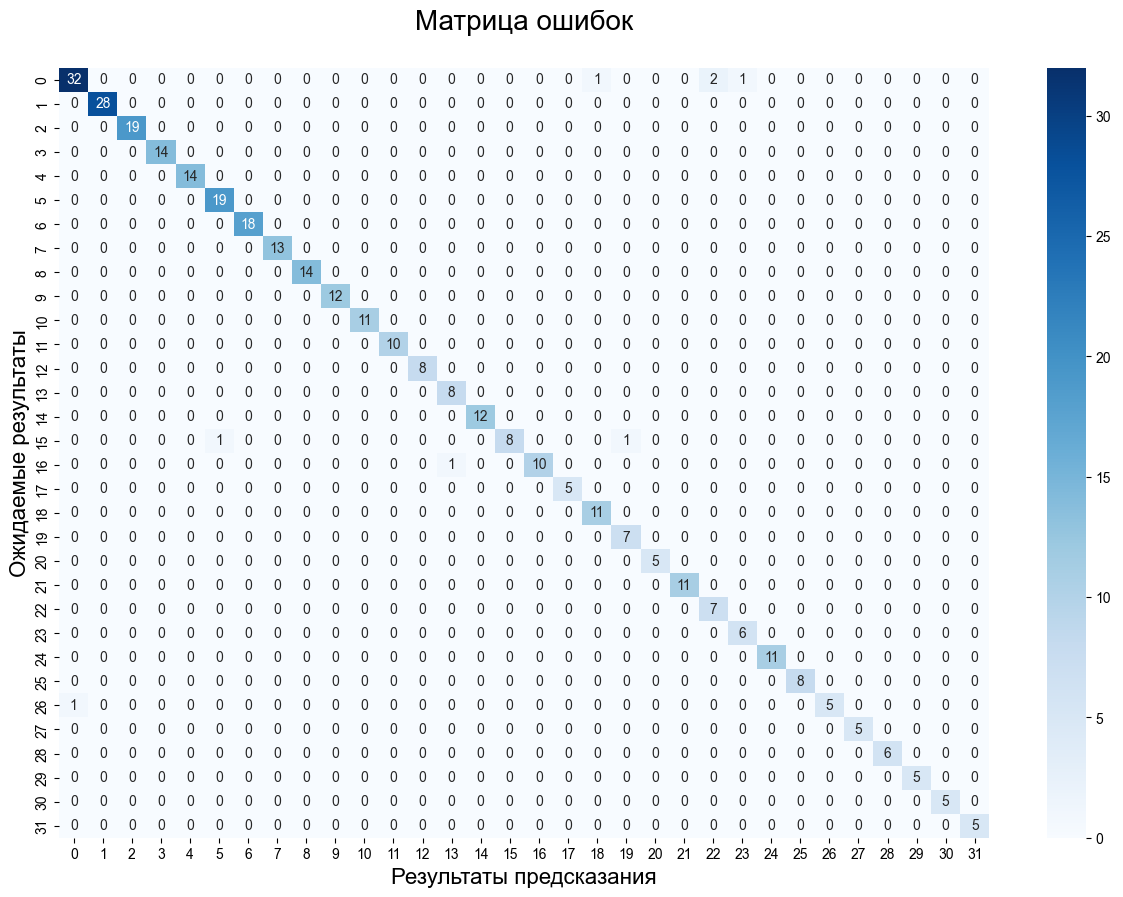

In [26]:
plt.figure(figsize=(15, 10))
heatmap = sns.heatmap(confusion_matrix(y_dynamic_test, mlp_prediction), annot=True, cmap='Blues')
sns.set_style('white')
heatmap.set_title('Матрица ошибок' + "\n", fontsize=20);
heatmap.set_xlabel('Результаты предсказания', fontsize=16);
heatmap.set_ylabel('Ожидаемые результаты', fontsize=16);
plt.show()

### 3.2 Конечные данные
Подберём гиперпараметры для линейной регрессии.

In [27]:
lr_space = {
    'fit_intercept': hp.choice('fit_intercept', [True, False]),
    'copy_X': hp.choice('copy_X', [True, False]), 
    'positive': hp.choice('positive', [True, False])
}

best_lr = hp_slctns(model=LinearRegression(), x_train=x_final_train, y_train=y_final_train, 
                    scoring='neg_mean_absolute_error', space=lr_space)

100%|█████████████████████████████████████████████| 10/10 [00:00<00:00, 30.02trial/s, best loss: 3.745973694280855e-15]
Лучшие гиперпараметры: {'copy_X': 0, 'fit_intercept': 0, 'positive': 1}


Получим качество константной модели.

In [28]:
dummy_reg = quality(DummyRegressor(), return_qual=1, x_train=x_final_train, y_train=y_final_train, 
                    scoring='neg_mean_absolute_error')

Качество: 2.7692470238268463


Сохраним результаты константной модели в пустой датафрейм.

In [29]:
results_reg_df = pd.DataFrame(columns=['Качество', 'Время обучения', 'Скорость предсказания'])
results_reg_df.loc['Константная модель'] = [dummy_clf, 0, 0]

Добавим строку с временем обучения, скоростью предсказания и качеством многослойного перцептрона в таблицу с результатами.

In [30]:
lr = LinearRegression().set_params(**best_lr.get_params())
    
start_train_timer = time.time()
lr.fit(x_final_train, y_final_train)
stop_train_timer = time.time() - start_train_timer
    
start_pred_timer = time.time()
mlp_prediction = lr.predict(x_final_test)
score = mean_squared_log_error(y_final_test, mlp_prediction)
stop_pred_timer = time.time() - start_pred_timer
    
results_reg_df.loc['Линейная регрессия'] = [score, stop_train_timer, stop_pred_timer]

Рассмотрим получившеюся таблицу.

In [31]:
results_reg_df

,Качество,Время обучения,Скорость предсказания
Константная модель,-8.833333e-02,0.00000,0.000000
Линейная регрессия,2.541761e-31,0.00299,0.002994


### 3.3 Сохранение моделей

Запишем обученные модели в формат Pickle для возможности использования их в приложении.

In [32]:
joblib.dump(mlp, 'dynamic_mlp_clf.pkl')

['dynamic_mlp_clf.pkl']

In [34]:
joblib.dump(lr, 'final_lnr.pkl')

['final_lnr.pkl']

<div style="border:solid steelblue 5px; padding: 30px">
   <p>
        <b>Результаты работы с моделями:</b>
        <ol>
        <li>Разные модели обучены.</li>
        <li>Лучшие модели найдена, сравнены с константной и проверены на тестовой выборке.</li>
        <li>Проведён анализ предсказания.</li>
        <li>Модели сохранены.</li>
        </ol>
   </p>  
</div>

## 4 Отчёт

<hr style="color: steelblue; background-color: steelblue; height: 5px; border: none;">

### Описание ключевых шагов решения
1. При подготовке данных данные были изучены и разбиты на выборки.
1. Были обучены разные модели и выбрана лучшая.
1. Лучшая модель была сравнена с константной и протестирована на тестовой выборке.
1. Был проведён анализ предсказания.
1. Модели были сохранены.

***

### Описание моделей
**Динамические данные**

Модель — `MLPClassifier`.

Гиперпараметры:
- `random_state` = 0
- `alpha` = 0.00013077486554396252
- `hidden_layer_sizes` = 99
- `learning_rate_init` = 0.015332083009120187

**Конечные данные**

Модель — `LinearRegression`.

Гиперпараметры:
- `copy_X` = 0
- `fit_intercept` = 0
- `positive` = 1

***

### Итоговые метрики
**Динамические данные**

accuracy 0.747222

**Конечные данные**

mean_squared_log_error 1.567357e-31

<hr style="color: steelblue; background-color: steelblue; height: 5px; border: none;">